# Perkenalan
Nama/ Batch = Sandika/008

# Import Pustaka

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.metrics import RocCurveDisplay

# Data Loading

In [5]:
df_dummy= pd.read_csv('bank-additional-full.csv',sep=';')

In [6]:
df_dummy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df_dummy.shape

(41188, 21)

data terdiri dari 41188 baris dan 21 kolom

In [8]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

tidak ditemukan adanya value NaN

# EDA

In [9]:
df=df_dummy.copy()

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


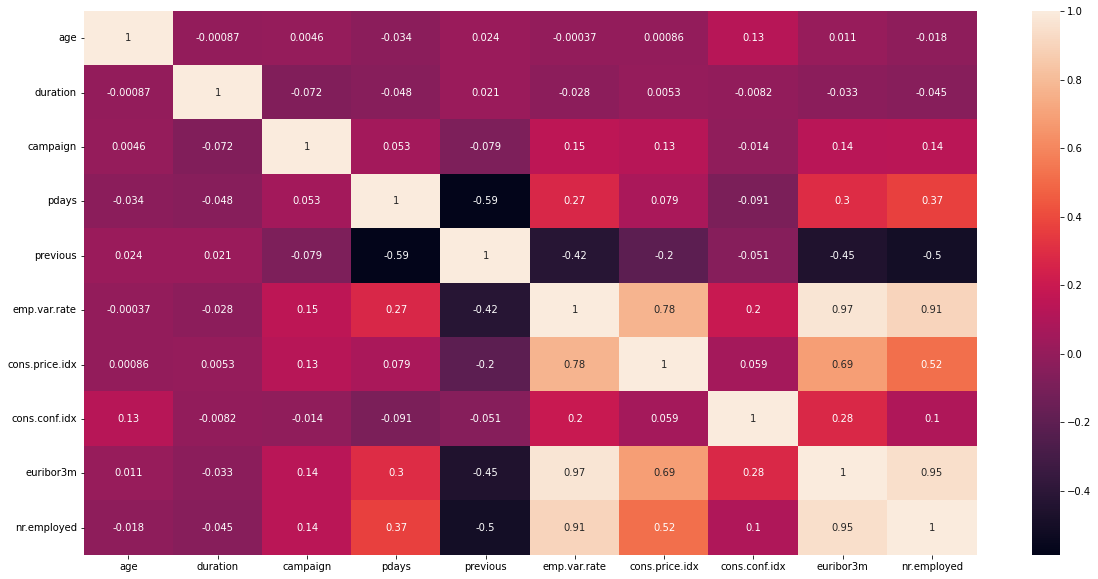

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

terdapat 88.73% menolak dan 11.27% menerima

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
numeric_only = df.select_dtypes(include=['int64','float64']).copy()

In [17]:
numeric_only.count()

age               41188
duration          41188
campaign          41188
pdays             41188
previous          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
dtype: int64

In [18]:
category_only = df.select_dtypes(include=['object']).copy()

In [19]:
category_only.count()

job            41188
marital        41188
education      41188
default        41188
housing        41188
loan           41188
contact        41188
month          41188
day_of_week    41188
poutcome       41188
y              41188
dtype: int64

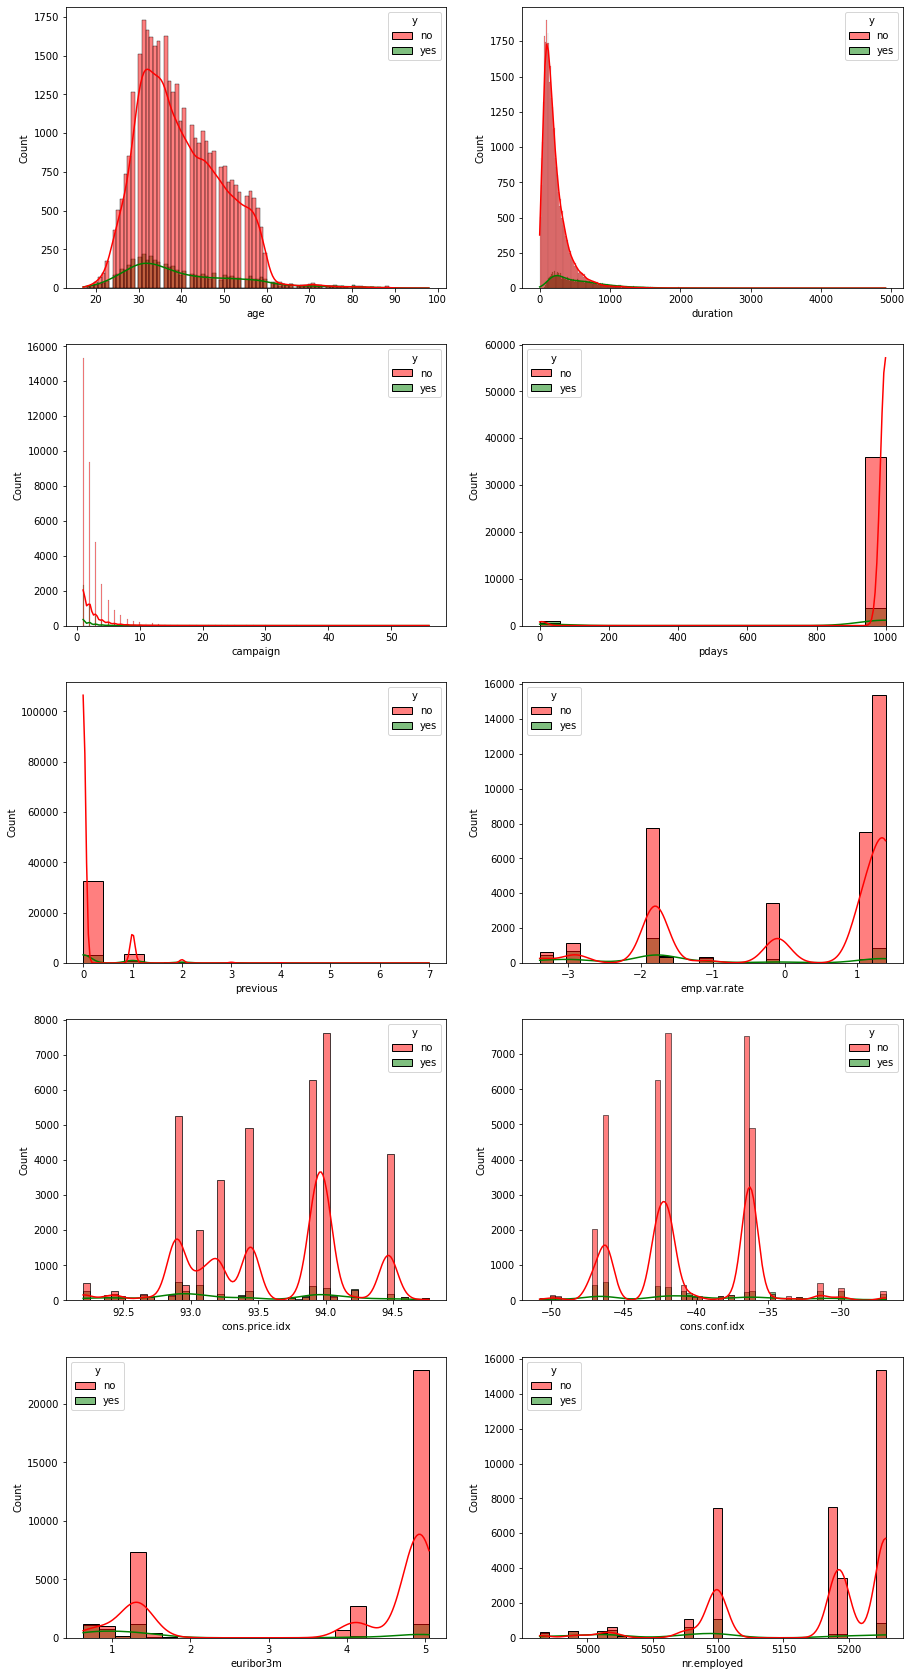

In [20]:
plt.figure(figsize=(15,30))

for i, col in enumerate(list(numeric_only.columns)):
    i += 1
    plt.subplot(5,2,i)
    sns.histplot(data = numeric_only, x = numeric_only[col], hue = df['y'], 
                 palette = {'yes':'green', 'no':'red'}, kde = True)

# Data Preprocessing

In [21]:
X = df.drop(['y'], axis=1)
y = df[['y']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [23]:
kat = [col for col in X_train.columns if X_train[col].dtypes == 'O']
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print('Numeric Columns:', num)
print('categorical Columns:', kat)

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [24]:
df.duplicated().sum()

12

In [25]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop = True, inplace = True)

proses penghapusan data duplikat dan juga melakukan reset index di dalam data

In [26]:
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder())
])

In [27]:
preprocessor =  ColumnTransformer([
    ('numeric', numerical_pipeline,['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']),
    ('category', categorical_pipeline,['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
])

proses pembuatan pipeline

# Model Definition, Training, & Evaluation

## KNN

In [28]:
pipeline_knn = Pipeline([
    ('prep',preprocessor),
    ('algo_knn',KNeighborsClassifier())
])

In [29]:
pipeline_knn.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [30]:
parameter_knn = {
    'algo_knn__n_neighbors': range(3,5),
    'algo_knn__weights': ['uniform','distance'],
    'algo_knn__p': [1,2]
}

In [31]:
model_knn= GridSearchCV(pipeline_knn, parameter_knn, cv=3, n_jobs=-1, verbose=1)
model_knn.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [32]:
pd.DataFrame(model_knn.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_knn__n_neighbors,param_algo_knn__p,param_algo_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.283337,0.007994,13.522970,9.533082,3,1,uniform,"{'algo_knn__n_neighbors': 3, 'algo_knn__p': 1,...",0.889111,0.889101,NaN,NaN,NaN,1
1,0.270387,0.010100,12.728617,8.973421,3,1,distance,"{'algo_knn__n_neighbors': 3, 'algo_knn__p': 1,...",0.882192,0.880178,NaN,NaN,NaN,2
2,0.266960,0.019885,5.822908,4.091283,3,2,uniform,"{'algo_knn__n_neighbors': 3, 'algo_knn__p': 2,...",0.888929,0.888191,NaN,NaN,NaN,3
3,0.269924,0.014199,4.922900,3.455595,3,2,distance,"{'algo_knn__n_neighbors': 3, 'algo_knn__p': 2,...",0.880736,0.878904,NaN,NaN,NaN,4
4,0.263630,0.004188,13.716280,9.673226,4,1,uniform,"{'algo_knn__n_neighbors': 4, 'algo_knn__p': 1,...",0.891661,0.892288,NaN,NaN,NaN,5


In [33]:
model_knn.best_params_

{'algo_knn__n_neighbors': 3, 'algo_knn__p': 1, 'algo_knn__weights': 'uniform'}

In [34]:
model_knn.score(X_train,y_train),model_knn.score(X_test,y_test)

(0.9306828528072838, 0.8903860160233066)

In [118]:
y_pred_knn_train = model_knn.predict(X_train)

In [119]:
y_pred_knn_test = model_knn.predict(X_test)

In [120]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_knn_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.94      0.98      0.96     29236
         yes       0.80      0.51      0.63      3714

    accuracy                           0.93     32950
   macro avg       0.87      0.75      0.79     32950
weighted avg       0.93      0.93      0.92     32950



In [121]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_knn_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7312
         yes       0.52      0.29      0.38       926

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



Kombinasi hyperparameter terbaik di metode KNN adalah
 
- n_neighbors = 3, p = 1, weights = uniform

dengan skor 93 % untuk train dan 89 % untuk test

- terjadi sedikit overfitting

## Logistic Regression

In [35]:
pipeline_logreg = Pipeline([
    ('prep',preprocessor),
    ('algo_logreg',LogisticRegression(),)
])

In [36]:
pipeline_logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [37]:
parameter_logreg = {
    'algo_logreg__C': [0.01, 0.1, 1, 10, 100]
}

In [38]:
model_logreg= GridSearchCV(pipeline_logreg, parameter_logreg, cv=3, n_jobs=-1, verbose=1)
model_logreg.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [39]:
pd.DataFrame(model_logreg.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_logreg__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.573539,0.012806,0.099933,0.043550,0.01,{'algo_logreg__C': 0.01},0.899945,0.898388,NaN,NaN,NaN,1
1,0.885491,0.050141,0.099303,0.029294,0.1,{'algo_logreg__C': 0.1},0.908230,0.906856,NaN,NaN,NaN,2
2,1.114450,0.011212,0.104508,0.051219,1,{'algo_logreg__C': 1},0.910415,0.910498,NaN,NaN,NaN,3
3,1.104834,0.036128,0.108558,0.028622,10,{'algo_logreg__C': 10},0.910142,0.911135,NaN,NaN,NaN,4
4,1.008073,0.161382,0.089643,0.047109,100,{'algo_logreg__C': 100},0.909869,0.911317,NaN,NaN,NaN,5


In [40]:
model_logreg.best_params_

{'algo_logreg__C': 0.01}

In [41]:
model_logreg.score(X_train,y_train),model_logreg.score(X_test,y_test)

(0.9008194233687405, 0.8988832240835154)

In [42]:
y_pred_logreg_train = model_logreg.predict(X_train)

In [43]:
y_pred_logreg_test = model_logreg.predict(X_test)

In [44]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_logreg_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7312
         yes       0.69      0.18      0.29       926

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [45]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_logreg_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29236
         yes       0.72      0.20      0.31      3714

    accuracy                           0.90     32950
   macro avg       0.81      0.59      0.63     32950
weighted avg       0.89      0.90      0.87     32950



Kombinasi hyperparameter terbaik di metode Logistic Regression adalah
 
- C: 0.01

dengan skor 90.1 % untuk train dan 90 % untuk test

- tidak terjadi overfitting

## SVM

In [46]:
pipeline_svm = Pipeline([
    ('prep',preprocessor),
    ('algo_svc',SVC())
])

In [47]:
pipeline_svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [48]:
parameter_svm= {
    'algo_svc__C': [0.5, 1.0],
    'algo_svc__kernel': ['linear','poly','rbf','sigmoid']

}

In [49]:
model_SVC= GridSearchCV(pipeline_svm, parameter_svm, cv=3, n_jobs=-1, verbose=1)
model_SVC.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [50]:
pd.DataFrame(model_SVC.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_svc__C,param_algo_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.479094,0.396298,2.876077,2.005457,0.5,linear,"{'algo_svc__C': 0.5, 'algo_svc__kernel': 'line...",0.903860,0.901757,NaN,NaN,NaN,1
1,17.081896,0.333564,3.711747,2.592710,0.5,poly,"{'algo_svc__C': 0.5, 'algo_svc__kernel': 'poly'}",0.903041,0.901757,NaN,NaN,NaN,2
2,22.334691,0.254914,8.072340,5.676737,0.5,rbf,"{'algo_svc__C': 0.5, 'algo_svc__kernel': 'rbf'}",0.899399,0.897660,NaN,NaN,NaN,3
3,17.890476,0.953840,4.084477,2.859687,0.5,sigmoid,"{'algo_svc__C': 0.5, 'algo_svc__kernel': 'sigm...",0.854151,0.857325,NaN,NaN,NaN,4
4,19.786922,0.835843,2.884879,2.010542,1.0,linear,"{'algo_svc__C': 1.0, 'algo_svc__kernel': 'line...",0.905954,0.904034,NaN,NaN,NaN,5


In [51]:
model_SVC.best_params_

{'algo_svc__C': 0.5, 'algo_svc__kernel': 'linear'}

In [52]:
model_SVC.score(X_train,y_train),model_SVC.score(X_test,y_test)

(0.9037329286798179, 0.9010682204418549)

In [53]:
y_pred_svc_train = model_SVC.predict(X_train)

In [54]:
y_pred_svc_test = model_logreg.predict(X_test)

In [55]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_svc_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7312
         yes       0.69      0.18      0.29       926

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [56]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_svc_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     29236
         yes       0.66      0.30      0.42      3714

    accuracy                           0.90     32950
   macro avg       0.79      0.64      0.68     32950
weighted avg       0.89      0.90      0.89     32950



Kombinasi hyperparameter terbaik di metode SVM adalah
 
- C: 0.5 dan kernel : linear

dengan skor 90.4 % untuk train dan 90.2 % untuk test

- tidak terjadi overfitting

## DECISION TREE

In [57]:
pipeline_dt = Pipeline([
    ('prep',preprocessor),
    ('algo_dt',DecisionTreeClassifier())
])

In [58]:
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [59]:
parameter_dt= {
    'algo_dt__max_depth': [10, 30, 100],
    'algo_dt__min_samples_split': [5, 30, 100],
    'algo_dt__min_samples_leaf' : [1, 10, 30],
    'algo_dt__max_features': ['auto', 'log2']

}

In [60]:
model_dt= GridSearchCV(pipeline_dt, parameter_dt, cv=3, n_jobs=-1, verbose=1)
model_dt.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [61]:
pd.DataFrame(model_dt.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_dt__max_depth,param_algo_dt__max_features,param_algo_dt__min_samples_leaf,param_algo_dt__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.314416,0.005963,0.103530,0.046804,10,auto,1,5,"{'algo_dt__max_depth': 10, 'algo_dt__max_featu...",0.903678,0.898662,NaN,NaN,NaN,1
29,0.300331,0.010590,0.089777,0.036865,30,log2,1,100,"{'algo_dt__max_depth': 30, 'algo_dt__max_featu...",0.897305,0.898206,NaN,NaN,NaN,2
30,0.300698,0.010394,0.088239,0.036754,30,log2,10,5,"{'algo_dt__max_depth': 30, 'algo_dt__max_featu...",0.895666,0.897114,NaN,NaN,NaN,3
31,0.305475,0.020244,0.089149,0.036783,30,log2,10,30,"{'algo_dt__max_depth': 30, 'algo_dt__max_featu...",0.896850,0.900756,NaN,NaN,NaN,4
32,0.288834,0.003723,0.095965,0.035978,30,log2,10,100,"{'algo_dt__max_depth': 30, 'algo_dt__max_featu...",0.897032,0.898844,NaN,NaN,NaN,5


In [62]:
model_dt.best_params_

{'algo_dt__max_depth': 10,
 'algo_dt__max_features': 'auto',
 'algo_dt__min_samples_leaf': 1,
 'algo_dt__min_samples_split': 5}

In [63]:
model_dt.score(X_train,y_train),model_dt.score(X_test,y_test)

(0.9163884673748103, 0.9039815489196407)

In [64]:
y_pred_dt_train = model_dt.predict(X_train)

In [65]:
y_pred_dt_test = model_dt.predict(X_test)

In [66]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_svc_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     29236
         yes       0.66      0.30      0.42      3714

    accuracy                           0.90     32950
   macro avg       0.79      0.64      0.68     32950
weighted avg       0.89      0.90      0.89     32950



In [67]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_dt_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7312
         yes       0.62      0.38      0.47       926

    accuracy                           0.90      8238
   macro avg       0.77      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238



Kombinasi hyperparameter terbaik di metode Decision Tree adalah
 
- max_depth = 10, max_features = 'auto', min_samples_leaf = 1, min_samples_split=5

dengan skor 91.7 % untuk train dan 90.2 % untuk test

- tidak terjadi overfitting

## Random Forest

In [68]:
pipeline_rf = Pipeline([
    ('prep',preprocessor),
    ('algo_rf',RandomForestClassifier())
])

In [69]:
pipeline_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [70]:
parameter_rf= {
    'algo_rf__max_depth': [5, 10, 20],
    'algo_rf__min_samples_split': [3, 30],
    'algo_rf__min_samples_leaf' : [5, 10],
    'algo_rf__n_estimators': [50, 100, 200]
}

In [71]:
model_rf= GridSearchCV(pipeline_rf, parameter_rf, cv=3, n_jobs=-1, verbose=1)
model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [72]:
pd.DataFrame(model_rf.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_rf__max_depth,param_algo_rf__min_samples_leaf,param_algo_rf__min_samples_split,param_algo_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.158700,0.021020,0.141811,0.074647,5,5,3,50,"{'algo_rf__max_depth': 5, 'algo_rf__min_sample...",0.901948,0.899481,NaN,NaN,NaN,1
20,5.518039,0.020787,0.345240,0.217400,10,10,3,200,"{'algo_rf__max_depth': 10, 'algo_rf__min_sampl...",0.909050,0.908768,NaN,NaN,NaN,2
21,1.557088,0.032736,0.149730,0.079973,10,10,30,50,"{'algo_rf__max_depth': 10, 'algo_rf__min_sampl...",0.908867,0.906947,NaN,NaN,NaN,3
22,2.913853,0.021638,0.208813,0.121403,10,10,30,100,"{'algo_rf__max_depth': 10, 'algo_rf__min_sampl...",0.908776,0.906492,NaN,NaN,NaN,4
23,5.551244,0.047303,0.337845,0.210519,10,10,30,200,"{'algo_rf__max_depth': 10, 'algo_rf__min_sampl...",0.907684,0.906674,NaN,NaN,NaN,5


In [73]:
model_rf.best_params_

{'algo_rf__max_depth': 5,
 'algo_rf__min_samples_leaf': 5,
 'algo_rf__min_samples_split': 3,
 'algo_rf__n_estimators': 50}

In [74]:
model_rf.score(X_train,y_train),model_rf.score(X_test,y_test)

(0.9031866464339909, 0.9024034959941734)

In [75]:
y_pred_rf_train = model_rf.predict(X_train)

In [76]:
y_pred_rf_test = model_rf.predict(X_test)

In [77]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_rf_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29236
         yes       0.79      0.19      0.31      3714

    accuracy                           0.90     32950
   macro avg       0.85      0.59      0.63     32950
weighted avg       0.89      0.90      0.88     32950



In [78]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_rf_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7312
         yes       0.79      0.18      0.29       926

    accuracy                           0.90      8238
   macro avg       0.85      0.59      0.62      8238
weighted avg       0.89      0.90      0.87      8238



Kombinasi hyperparameter terbaik di metode Random Forest adalah

- max_depth = 5, n_estimators = 50, min_samples_leaf = 5, min_samples_split=3
dengan skor 90.38 % untuk train dan 90.2 % untuk test

tidak terjadi overfitting

## Naive Bayes

In [79]:
pipeline_nb = Pipeline([
    ('prep',preprocessor),
    ('algo_nb',GaussianNB())
])

In [80]:
pipeline_nb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [81]:
parameter_nb= {
    'algo_nb__var_smoothing': [1e-10, 1]
}

In [82]:
model_nb= GridSearchCV(pipeline_nb, parameter_nb, cv=3, n_jobs=-1, verbose=1)
model_nb.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [83]:
pd.DataFrame(model_nb.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_nb__var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.323569,0.007605,0.113216,0.053176,0.0,{'algo_nb__var_smoothing': 1e-10},0.783412,0.787672,NaN,NaN,NaN,1
1,0.323448,0.030286,0.096413,0.052804,1,{'algo_nb__var_smoothing': 1},0.894483,0.892197,NaN,NaN,NaN,2


In [84]:
model_nb.best_params_

{'algo_nb__var_smoothing': 1e-10}

In [85]:
model_nb.score(X_train,y_train),model_nb.score(X_test,y_test)

(0.7938088012139606, 0.7927895120174799)

Kombinasi hyperparameter terbaik di metode Naive Baynes adalah

var_smoothing= 1e-10
dengan skor 79.4 % untuk train dan 79.3 % untuk test

tidak terjadi overfitting

In [86]:
y_pred_nb_train = model_nb.predict(X_train)

In [87]:
y_pred_nb_test = model_nb.predict(X_test)

In [88]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_nb_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.96      0.80      0.87     29236
         yes       0.32      0.72      0.44      3714

    accuracy                           0.79     32950
   macro avg       0.64      0.76      0.66     32950
weighted avg       0.89      0.79      0.82     32950



In [89]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_nb_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.95      0.80      0.87      7312
         yes       0.31      0.70      0.43       926

    accuracy                           0.79      8238
   macro avg       0.63      0.75      0.65      8238
weighted avg       0.88      0.79      0.82      8238



## Gradien Boost

In [90]:
pipeline_gb = Pipeline([
    ('prep',preprocessor),
    ('algo_gb',GradientBoostingClassifier())
])

In [91]:
pipeline_gb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [92]:
parameter_gb= {
    'algo_gb__max_depth': [5, 10],
    'algo_gb__learning_rate': [1, 10],
    'algo_gb__n_estimators': [1, 10, 100]
}

In [93]:
model_gb= GridSearchCV(pipeline_gb, parameter_gb, cv=3, n_jobs=-1, verbose=1)
model_gb.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [94]:
pd.DataFrame(model_gb.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_gb__learning_rate,param_algo_gb__max_depth,param_algo_gb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.435295,0.021899,0.098032,0.042237,1,5,1,"{'algo_gb__learning_rate': 1, 'algo_gb__max_de...",0.909323,0.904216,NaN,NaN,NaN,1
1,1.844766,0.030819,0.094912,0.038653,1,5,10,"{'algo_gb__learning_rate': 1, 'algo_gb__max_de...",0.900401,0.900392,NaN,NaN,NaN,2
2,16.292152,0.202569,0.118309,0.052118,1,5,100,"{'algo_gb__learning_rate': 1, 'algo_gb__max_de...",0.894847,0.897023,NaN,NaN,NaN,3
3,0.617287,0.009416,0.094838,0.037443,1,10,1,"{'algo_gb__learning_rate': 1, 'algo_gb__max_de...",0.898398,0.893472,NaN,NaN,NaN,4
4,3.431254,0.024469,0.098459,0.042506,1,10,10,"{'algo_gb__learning_rate': 1, 'algo_gb__max_de...",0.896304,0.887645,NaN,NaN,NaN,5


In [95]:
model_gb.best_params_

{'algo_gb__learning_rate': 1,
 'algo_gb__max_depth': 5,
 'algo_gb__n_estimators': 1}

In [96]:
model_gb.score(X_train,y_train),model_gb.score(X_test,y_test)

(0.9057056145675265, 0.8996115562029618)

In [97]:
y_pred_gb_train = model_gb.predict(X_train)

In [98]:
y_pred_gb_test = model_gb.predict(X_test)

In [99]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_gb_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.97      0.92      0.95     29236
         yes       0.56      0.76      0.64      3714

    accuracy                           0.91     32950
   macro avg       0.76      0.84      0.80     32950
weighted avg       0.92      0.91      0.91     32950



In [100]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_gb_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.96      0.92      0.94      7312
         yes       0.54      0.73      0.62       926

    accuracy                           0.90      8238
   macro avg       0.75      0.83      0.78      8238
weighted avg       0.92      0.90      0.91      8238



Kombinasi hyperparameter terbaik di metode Gradien Boost adalah

learning_rate = 1, max_depth = 5, n_estimators = 1
dengan skor 90.6 % untuk train dan 90 % untuk test

tidak terjadi overfitting

## Ada Boost

In [101]:
pipeline_ab = Pipeline([
    ('prep',preprocessor),
    ('algo_ab',AdaBoostClassifier())
])

In [102]:
pipeline_ab.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [103]:
parameter_ab= {
    'algo_ab__learning_rate': [0.1, 1],
    'algo_ab__n_estimators': [10,50,100]
}

In [104]:
model_ab= GridSearchCV(pipeline_ab, parameter_ab, cv=3, n_jobs=-1, verbose=1)
model_ab.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
         

In [105]:
pd.DataFrame(model_ab.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_ab__learning_rate,param_algo_ab__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.211041,0.071088,0.121706,0.059880,0.1,10,"{'algo_ab__learning_rate': 0.1, 'algo_ab__n_es...",0.893937,0.891742,NaN,NaN,NaN,1
1,5.226864,0.098109,0.259060,0.156273,0.1,50,"{'algo_ab__learning_rate': 0.1, 'algo_ab__n_es...",0.896304,0.896750,NaN,NaN,NaN,2
2,9.981869,0.167135,0.430529,0.276928,0.1,100,"{'algo_ab__learning_rate': 0.1, 'algo_ab__n_es...",0.904680,0.906310,NaN,NaN,NaN,3
3,1.116670,0.016380,0.123864,0.061239,1,10,"{'algo_ab__learning_rate': 1, 'algo_ab__n_esti...",0.904497,0.900574,NaN,NaN,NaN,4
4,5.108431,0.125638,0.250753,0.143632,1,50,"{'algo_ab__learning_rate': 1, 'algo_ab__n_esti...",0.910051,0.910225,NaN,NaN,NaN,5


In [106]:
model_ab.best_params_

{'algo_ab__learning_rate': 0.1, 'algo_ab__n_estimators': 10}

In [107]:
model_ab.score(X_train,y_train),model_ab.score(X_test,y_test)

(0.8932018209408195, 0.892571012381646)

In [108]:
y_pred_ab_train = model_ab.predict(X_train)

In [109]:
y_pred_ab_test = model_ab.predict(X_test)

In [110]:
print('Classification Report (Data Train)')
print(classification_report(y_train, y_pred_ab_train))

Classification Report (Data Train)
              precision    recall  f1-score   support

          no       0.90      1.00      0.94     29236
         yes       0.72      0.09      0.15      3714

    accuracy                           0.89     32950
   macro avg       0.81      0.54      0.55     32950
weighted avg       0.88      0.89      0.85     32950



In [111]:
print('Classification Report (Data Test)')
print(classification_report(y_test, y_pred_ab_test))

Classification Report (Data Test)
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7312
         yes       0.67      0.09      0.16       926

    accuracy                           0.89      8238
   macro avg       0.78      0.54      0.55      8238
weighted avg       0.87      0.89      0.85      8238



Kombinasi hyperparameter terbaik di metode Ada Boost adalah

learning_rate = 0.1, n_estimators = 10
dengan skor 89.32 % untuk train dan 89.26 % untuk test

tidak terjadi overfitting

# Model Inference

Model inference akan menggunakan metode Gradien Boost karena memiliki nilai recall terbesar serta akurasi yang memadai

In [112]:
pipeline_gb_best = Pipeline([
    ('prep',preprocessor),
    ('algo_gb',GradientBoostingClassifier(learning_rate = 1, max_depth = 5, n_estimators = 50)
     )
])


In [122]:
data_inference = df.sample(2)

In [123]:
data_inference.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25401,36,technician,single,professional.course,no,yes,no,telephone,nov,tue,34,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
1813,52,management,married,high.school,unknown,yes,no,telephone,may,fri,113,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [124]:
pipeline_gb_best.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
         

In [125]:
Gradient_boost_prediction=pipeline_gb_best.predict(data_inference)

In [126]:
data_inference['Random forest prediction']=Gradient_boost_prediction
data_inference

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Random forest prediction
25401,36,technician,single,professional.course,no,yes,no,telephone,nov,tue,34,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,no
1813,52,management,married,high.school,unknown,yes,no,telephone,may,fri,113,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,no


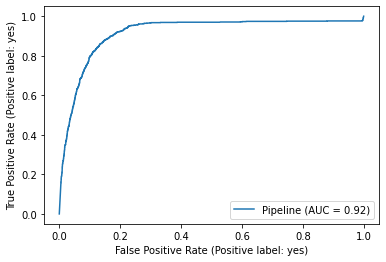

In [129]:
RocCurveDisplay.from_estimator(pipeline_gb_best, X_test, y_test)

Dari ROC Curve dapat disimpulkan bahwa peluang model bisa memprediksi positif dan negatif secara benar adalah 92%

# Kesimpulan

**Cross Validation** yang dilakukan ditiap model adalah sebesar **tiga** kali

Dilakukan perbandingan antara model:

1. Logistic Regression
2. SVC
3. Decision Tree
4. Random Forest
5. Ada Boost
6. Gradient Boost
7. K-Nearest Neighbors
8. Naive Bayes

dapat diambil kesimpulan model yang terbaik adalah **Gradient Boost** dengan parameter:


*   learning_rate = 1
*   max_depth = 5
*   n_estimators = 50

menghasilkan akurasi dengan skor 90.6 % untuk train dan 90 % untuk test dapat diambil kesimpulan bahwa data hanya sedikit mengalami overfitting selain itu metode **Gradient Boost** memiliki nilai recall paling tinggi untuk 'yes' sebesar 0.76 untuk train dan 0.73 untuk test


---
🥰🥰🥰🥰🥰SEKIAN TERIMAKASIH🥰🥰🥰🥰🥰

catatan: pemilihan variabel bisa saja salah dikarenakan keterbatasan device yang digunakan ✌



